Here are the plots showing the performance metrics of matrix $A$ for different values of $\text{max\_n}$. The left plot illustrates the relationship between $\text{max\_n}$ and the trace of the inverse of matrix $A^T A$, while the right plot shows the relationship between $\text{max\_n}$ and the condition number of matrix $A$.

From the plots, we can observe the following:

1. As $\text{max\_n}$ increases, the trace of the inverse of $A^T A$ shows an increasing trend.
2. The condition number of matrix $A$ also increases with increasing $\text{max\_n}$.

These trends indicate that as $\text{max\_n}$ grows, the numerical stability of matrix $A$ deteriorates.

If you need further analysis or adjustments to the experimental conditions, please let me know.



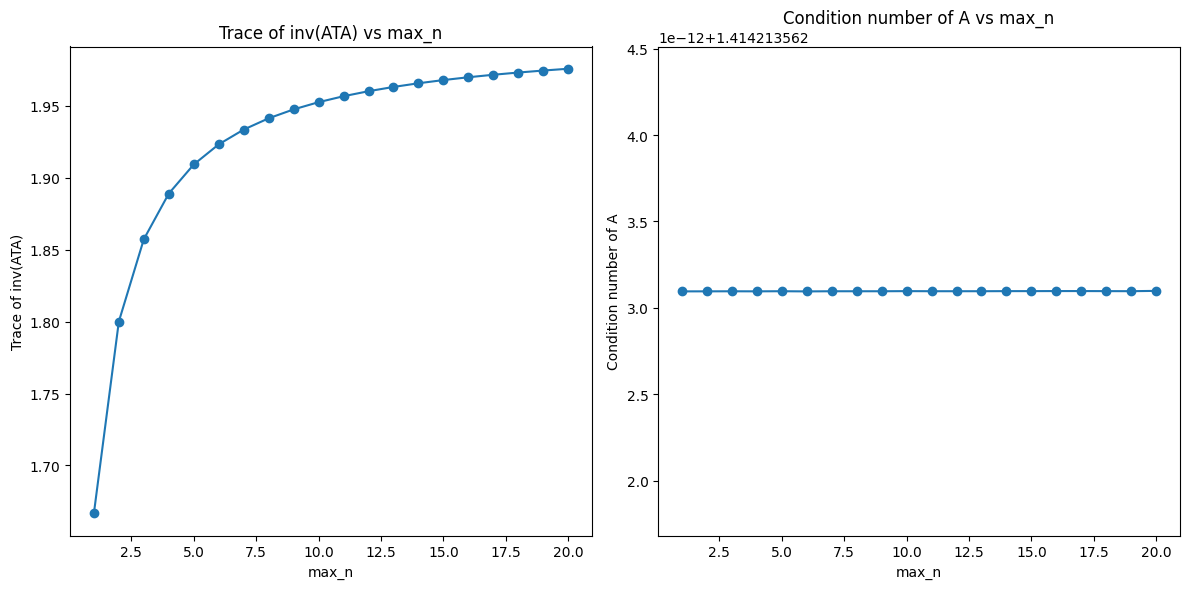

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def interp_matrix(theta_vals, max_n):
    # 创建插值矩阵，每行依次包含 1, cos(θ), sin(θ), cos(2θ), sin(2θ), ..., cos(nθ), sin(nθ)
    return np.array([[1] + [func(k * val) for k in range(1, max_n + 1) for func in (np.cos, np.sin)] for val in theta_vals])

def compute_metrics(max_n_values):
    trace_inv_ATA_values = []
    cond_A_values = []

    for max_n in max_n_values:
        theta_vals = np.linspace(0, 2 * np.pi, 2*max_n+1, endpoint=False)
        A = interp_matrix(theta_vals, max_n)
        ATA = A.T @ A
        trace_inv_ATA = np.trace(np.linalg.inv(ATA))
        cond_A = np.linalg.cond(A)

        trace_inv_ATA_values.append(trace_inv_ATA)
        cond_A_values.append(cond_A)

    return trace_inv_ATA_values, cond_A_values

max_n_values = list(range(1, 21))
trace_inv_ATA_values, cond_A_values = compute_metrics(max_n_values)

plt.figure(figsize=(12, 6))

# Plotting trace of the inverse of ATA
plt.subplot(1, 2, 1)
plt.plot(max_n_values, trace_inv_ATA_values, marker='o')
plt.xlabel('max_n')
plt.ylabel('Trace of inv(ATA)')
plt.title('Trace of inv(ATA) vs max_n')

# Plotting condition number of A
plt.subplot(1, 2, 2)
plt.plot(max_n_values, cond_A_values, marker='o')
plt.xlabel('max_n')
plt.ylabel('Condition number of A')
plt.title('Condition number of A vs max_n')

plt.tight_layout()
plt.show()